<a href="https://colab.research.google.com/github/dakw/AutoNER/blob/master/2_Word2Vec_KIng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Word2Vec

 - 텍스트 데이터에서 단어의 분산 표현을 학습하는 도구
 - 단어의 유사도를 계산하고, 단어의 의미론적 관계를 파악할 수 있습니다.
 - 자연어 처리 분야에서 많이 활용되며, 유사한 단어를 추천하거나 문장의 의미를 파악하는 등의 다양한 작업에 활용됩니다.

<br>

### gensim 라이브러리를 이용해서 Word2Vec을 한 번 훑어보죠.



In [ ]:
!pip install --upgrade gensim

In [ ]:
from gensim.models import Word2Vec

# 학습할 단어들 정의
sentences = [['Jensen', 'like', 'tea', 'and', 'cake', 'in','the','car','on','birthday','word2vec'],
            ['King', 'is', 'married', 'with', 'queen'],
            ['King', 'is', 'man'],
            ['Queen','is','woman'],
            ['King', 'saw', 'cloud','over','water'],
            ['Cake', 'is', 'the', 'type','of','bread']]

# train model
model = Word2Vec(sentences, vector_size=100, min_count=1) # vector_size가 차원수가 됩니다.

# summarize the loaded model
print(model)

# summarize vocabulary - 모델에 있는 모든 단어를 인덱스에 넣고 리스트
words = list(model.wv.key_to_index) # changed from vocab to key_to_index in Gensim 4.0.0
print(words)

# access vector for one word - model.wv를 이용해서 워드 벡터에 액세스
print(model.wv['birthday']) # birthday의 Word2vec 임베딩을 봅시다.

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

# 출처 : https://ngio.co.kr/9518
# Gensim 4.0.0 대응이 되질 않아서 GPT-4로 수정받았어요

Word2Vec<vocab=27, vector_size=100, alpha=0.025>
['is', 'King', 'the', 'bread', 'like', 'tea', 'and', 'cake', 'in', 'car', 'on', 'birthday', 'word2vec', 'married', 'of', 'with', 'queen', 'man', 'Queen', 'woman', 'saw', 'cloud', 'over', 'water', 'Cake', 'type', 'Jensen']
[ 9.7714197e-03  8.1620673e-03  1.2780726e-03  5.0972598e-03
  1.4069167e-03 -6.4557586e-03 -1.4241486e-03  6.4503071e-03
 -4.6185562e-03 -3.9974251e-03  4.9262121e-03  2.7150316e-03
 -1.8516944e-03 -2.8763695e-03  6.0076430e-03 -5.7175364e-03
 -3.2326863e-03 -6.4902497e-03 -4.2318865e-03 -8.5860305e-03
 -4.4710925e-03 -8.5129701e-03  1.4088572e-03 -8.6151036e-03
 -9.9161686e-03 -8.2025928e-03 -6.7767091e-03  6.6788029e-03
  3.7849853e-03  3.5690522e-04 -2.9515163e-03 -7.4236090e-03
  5.3231441e-04  5.0047867e-04  1.9192453e-04  8.5415825e-04
  7.8236818e-04 -6.9029229e-05 -8.0065159e-03 -5.8746273e-03
 -8.3771907e-03 -1.3138205e-03  1.8240606e-03  7.4105305e-03
 -1.9634999e-03 -2.3232966e-03  9.4863856e-03  7.9558398e-

In [ ]:
print(new_model.vector_size)

NameError: ignored

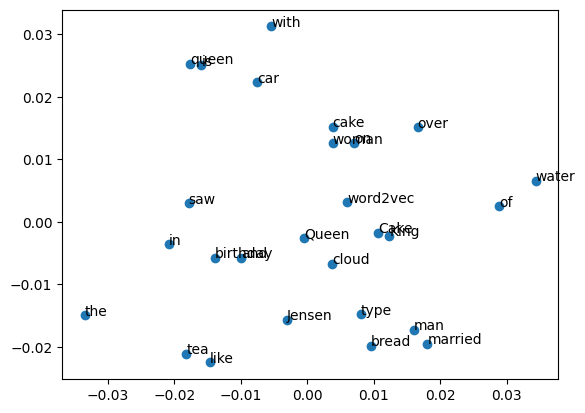

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index] # use model.wv[key_to_index] instead of model.wv.vocab
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index) # use model.wv[key_to_index] instead of model.wv.vocab
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


# 출처 : https://ngio.co.kr/9518
# Gensim 4.0.0 대응이 되질 않아서 GPT-4로 수정받았어요

### Google의 Word2Vec 임베딩으로 유사성 검색

```python

from gensim.models import KeyedVectors

# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

# 결과값은 아래와 같이 나옵니다.

[('queen', 0.7118192315101624)]

# 출처 : https://ngio.co.kr/9518
# Gensim 4.0.0 대응이 되질 않아서 GPT-4로 수정받았어요
# GoogleNews-vectors-negative300.bin이 3.4GB나 되서 포기
```